In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
save_path = '' #LO's path
# save_path = './fig/' #YC's path

## Functions to simulate PCR

In [3]:
def sim_random_access_eff_uniFileSize(primer_specs):
    pool_size, n_row, n_col = primer_specs
    max_file_size = 1
    pool = np.reshape(np.ones(pool_size), (n_row, n_col))
    amp_efficiency = 0.9
    cycle = 15
    ra_eff_bfPCR_list, ra_eff_afPCR_list, ra_eff_afLig_list = [], [], []
    for row in range(n_row):
        for col in range(n_col):
            pool_pcr = np.copy(pool)
            pool_pcr[:,col] = pool[:,col]*(1+amp_efficiency)*cycle
            pool_pcr[row,:] = pool[row,:]*(1+amp_efficiency)*cycle
            pool_pcr[row,col] = pool[row,col]*(1+amp_efficiency)**cycle
            dsDNA = sum(pool[row,:])-pool[row,col]+pool_pcr[row,col]
            ra_eff_bfPCR_list.append(100.0*pool[row,col]/np.sum(pool))
            ra_eff_afPCR_list.append(100.0*pool_pcr[row,col]/np.sum(pool_pcr))
            ra_eff_afLig_list.append(100.0*pool_pcr[row,col]/dsDNA)
    return (ra_eff_bfPCR_list, ra_eff_afPCR_list, ra_eff_afLig_list)

def sim_random_access_eff_ranFileSize(primer_specs):
    np.random.seed(42)
    pool_size, n_row, n_col = primer_specs
    max_file_size = 100
    pool = np.random.randint(low=1, high=max_file_size, size=(n_row, n_col))
    amp_efficiency = 0.9
    cycle = 15
    ra_eff_bfPCR_list, ra_eff_afPCR_list, ra_eff_afLig_list = [], [], []
    for row in range(n_row):
        for col in range(n_col):
            pool_pcr = np.copy(pool)
            pool_pcr[:,col] = pool[:,col]*(1+amp_efficiency)*cycle
            pool_pcr[row,:] = pool[row,:]*(1+amp_efficiency)*cycle
            pool_pcr[row,col] = pool[row,col]*(1+amp_efficiency)**cycle
            dsDNA = sum(pool[row,:])-pool[row,col]+pool_pcr[row,col]
            ra_eff_bfPCR_list.append(100.0*pool[row,col]/np.sum(pool))
            ra_eff_afPCR_list.append(100.0*pool_pcr[row,col]/np.sum(pool_pcr))
            ra_eff_afLig_list.append(100.0*pool_pcr[row,col]/dsDNA)
    return (ra_eff_bfPCR_list, ra_eff_afPCR_list, ra_eff_afLig_list)

def sim_random_access_eff_linspaceFileSize(primer_specs):
    pool_size, n_row, n_col = primer_specs
    max_file_size = 100
    pool = np.reshape(np.linspace(1,max_file_size, num=pool_size), (n_row, n_col))
    amp_efficiency = 0.9
    cycle = 15
    ra_eff_afPCR_list, ra_eff_bfPCR_list, ra_eff_afLig_list = [], [], []
    for row in range(n_row):
        for col in range(n_col):
            pool_pcr = np.copy(pool)
            pool_pcr[:,col] = pool[:,col]*(1+amp_efficiency)*cycle
            pool_pcr[row,:] = pool[row,:]*(1+amp_efficiency)*cycle
            pool_pcr[row,col] = pool[row,col]*(1+amp_efficiency)**cycle
            dsDNA = sum(pool[row,:])-pool[row,col]+pool_pcr[row,col]
            ra_eff_bfPCR_list.append(100.0*pool[row,col]/np.sum(pool))
            ra_eff_afPCR_list.append(100.0*pool_pcr[row,col]/np.sum(pool_pcr))
            ra_eff_afLig_list.append(100.0*pool_pcr[row,col]/dsDNA)
    return (ra_eff_bfPCR_list, ra_eff_afPCR_list, ra_eff_afLig_list)

## Functions to shape and plot the PCR simulation data


In [23]:
def make_pcr_sim_dict_subfigs(ra_eff_bfPCR, ra_eff_afPCR, ra_eff_afLig, pspec, sim_pcr, method):
    bf_col_label = method + "-" + "Before PCR"
    af_col_label = method + '-' + 'After PCR'
    afLig_col_label = method + "-" + "After Lig"
    if bf_col_label not in sim_pcr.keys(): # initialize dictionary if needed
        sim_pcr[bf_col_label] = []
        sim_pcr[af_col_label] = []
        sim_pcr[afLig_col_label] = []
    for i in range(len(ra_eff_bfPCR)):
        # only initialize this once, it's identical order for all methods
        # NOTE- CHANGE THIS IF YOU CHANGE NUMBER OF FILES BEING ANALYZED
        if len(sim_pcr['Number of Files']) < 11124: 
            sim_pcr['Number of Files'].append(pspec[0])
        sim_pcr[bf_col_label].append(ra_eff_bfPCR[i]) # before PCR
        sim_pcr[af_col_label].append(ra_eff_afPCR[i]) # after PCR
        sim_pcr[afLig_col_label].append(ra_eff_afLig[i]) # after Ligation
    return sim_pcr

def boxplots_sim_pcr_data_subfigs(sim_pcr, save_path, fname):
    """ 
    Given a panda dataframe of simulated PCR data, a string that is the title of the plot,
    a string that is the path to save the image (i.e., './dir/'), 
    and a string that is the saved file's name (i.e., 'my_fig.png'),
    saves a box plot of the data
    """
    # setting up plot(s)
    bfpcr_ymin, bfpcr_ymax = 0, 2.01
    afpcr_ymin, afpcr_ymax = 0, 100
    aflig_ymin, aflig_ymax = 0, 100
    
    sns.set_theme(style="whitegrid")
    sns.set_context("poster")
    fig, axes = plt.subplots(3, 3, sharex=True, figsize=(20, 16))
    fig.suptitle('Simulated File Behavior Before and After PCR and Ligation')
    ylab = 'Percent of Pool'
    
    sns.boxplot(ax=axes[0, 0], data=sim_pcr, x='Number of Files', y='Uniform File Size-Before PCR')
    sns.stripplot(ax=axes[0, 0], data=sim_pcr, x="Number of Files", y="Uniform File Size-Before PCR", dodge=True)
    axes[0,0].set_title('Uniform File Size')
    axes[0,0].set_ylabel(ylab)
    axes[0,0].set_xlabel('')
    axes[0,0].set_ylim(bfpcr_ymin,bfpcr_ymax)
    
    sns.boxplot(ax=axes[1, 0], data=sim_pcr, x='Number of Files', y='Uniform File Size-After PCR')
    sns.stripplot(ax=axes[1, 0], data=sim_pcr, x="Number of Files", y="Uniform File Size-After PCR", dodge=True)
#     axes[1,0].set_title('Uniform File Size')
    axes[1,0].set_ylabel(ylab)
    axes[1,0].set_xlabel('')
    axes[1,0].set_ylim(afpcr_ymin, afpcr_ymax)

    sns.boxplot(ax=axes[2, 0], data=sim_pcr, x='Number of Files', y='Uniform File Size-After Lig')
    sns.stripplot(ax=axes[2, 0], data=sim_pcr, x="Number of Files", y="Uniform File Size-After Lig", dodge=True)
#     axes[2,0].set_title('Uniform File Size')
    axes[2,0].set_ylabel(ylab)
    axes[2,0].set_ylim(aflig_ymin, aflig_ymax)
    
    sns.boxplot(ax=axes[0, 1], data=sim_pcr, x='Number of Files', y='Linearly Spaced File Sizes-Before PCR')
    sns.stripplot(ax=axes[0, 1], data=sim_pcr, x="Number of Files", y="Linearly Spaced File Sizes-Before PCR", dodge=True)
    axes[0,1].set_title('Linearly Spaced File Sizes')
    axes[0,1].set_ylabel('')
    axes[0,1].set_xlabel('')
    axes[0,1].set_ylim(bfpcr_ymin,bfpcr_ymax)
    
    sns.boxplot(ax=axes[1, 1], data=sim_pcr, x='Number of Files', y='Linearly Spaced File Sizes-After PCR')
    sns.stripplot(ax=axes[1, 1], data=sim_pcr, x="Number of Files", y="Linearly Spaced File Sizes-After PCR", dodge=True)
#     axes[1,1].set_title('Linearly Spaced File Sizes')
    axes[1,1].set_ylabel('')
    axes[1,1].set_xlabel('')
    axes[1,1].set_ylim(afpcr_ymin, afpcr_ymax)
    
    sns.boxplot(ax=axes[2, 1], data=sim_pcr, x='Number of Files', y='Linearly Spaced File Sizes-After Lig')
    sns.stripplot(ax=axes[2, 1], data=sim_pcr, x="Number of Files", y="Linearly Spaced File Sizes-After Lig", dodge=True)
#     axes[2,1].set_title('Linearly Spaced File Sizes')
    axes[2,1].set_ylabel('')
    axes[2,1].set_ylim(aflig_ymin, aflig_ymax)
    
    sns.boxplot(ax=axes[0, 2], data=sim_pcr, x='Number of Files', y='Randomly Generated File Size-Before PCR')
    sns.stripplot(ax=axes[0, 2], data=sim_pcr, x="Number of Files", y='Randomly Generated File Size-Before PCR', dodge=True)
    axes[0,2].set_title('Randomly Generated File Size')
    axes[0,2].set_ylabel('')
    axes[0,2].set_xlabel('')
    axes[0,2].set_ylim(bfpcr_ymin,bfpcr_ymax)

    sns.boxplot(ax=axes[1, 2], data=sim_pcr, x='Number of Files', y='Randomly Generated File Size-After PCR')
    sns.stripplot(ax=axes[1, 2], data=sim_pcr, x="Number of Files", y="Randomly Generated File Size-After PCR", dodge=True)
#     axes[1,2].set_title('Randomly Generated File Size')
    axes[1,2].set_ylabel('')
    axes[1,2].set_xlabel('')
    axes[1,2].set_ylim(afpcr_ymin, afpcr_ymax)

    sns.boxplot(ax=axes[2, 2], data=sim_pcr, x='Number of Files', y='Randomly Generated File Size-After Lig')
    sns.stripplot(ax=axes[2, 2], data=sim_pcr, x="Number of Files", y="Randomly Generated File Size-After Lig", dodge=True)
#     axes[2,2].set_title('Randomly Generated File Size')
    axes[2,2].set_ylabel('')
    axes[2,2].set_ylim(aflig_ymin, aflig_ymax)
    
    # annotations
    labsize = 25
    lab_xpos = -.05
    plt.gcf().text(lab_xpos,.76, 'Before PCR', fontsize=labsize)
    plt.gcf().text(lab_xpos,.5, 'After PCR', fontsize=labsize)
    plt.gcf().text(lab_xpos, .23, 'After Ligation', fontsize=labsize)
    
    filename = save_path + fname
    plt.savefig(filename, dpi=1000, bbox_inches='tight')
    plt.show()
    plt.clf()

## Perform and plot PCR simulations

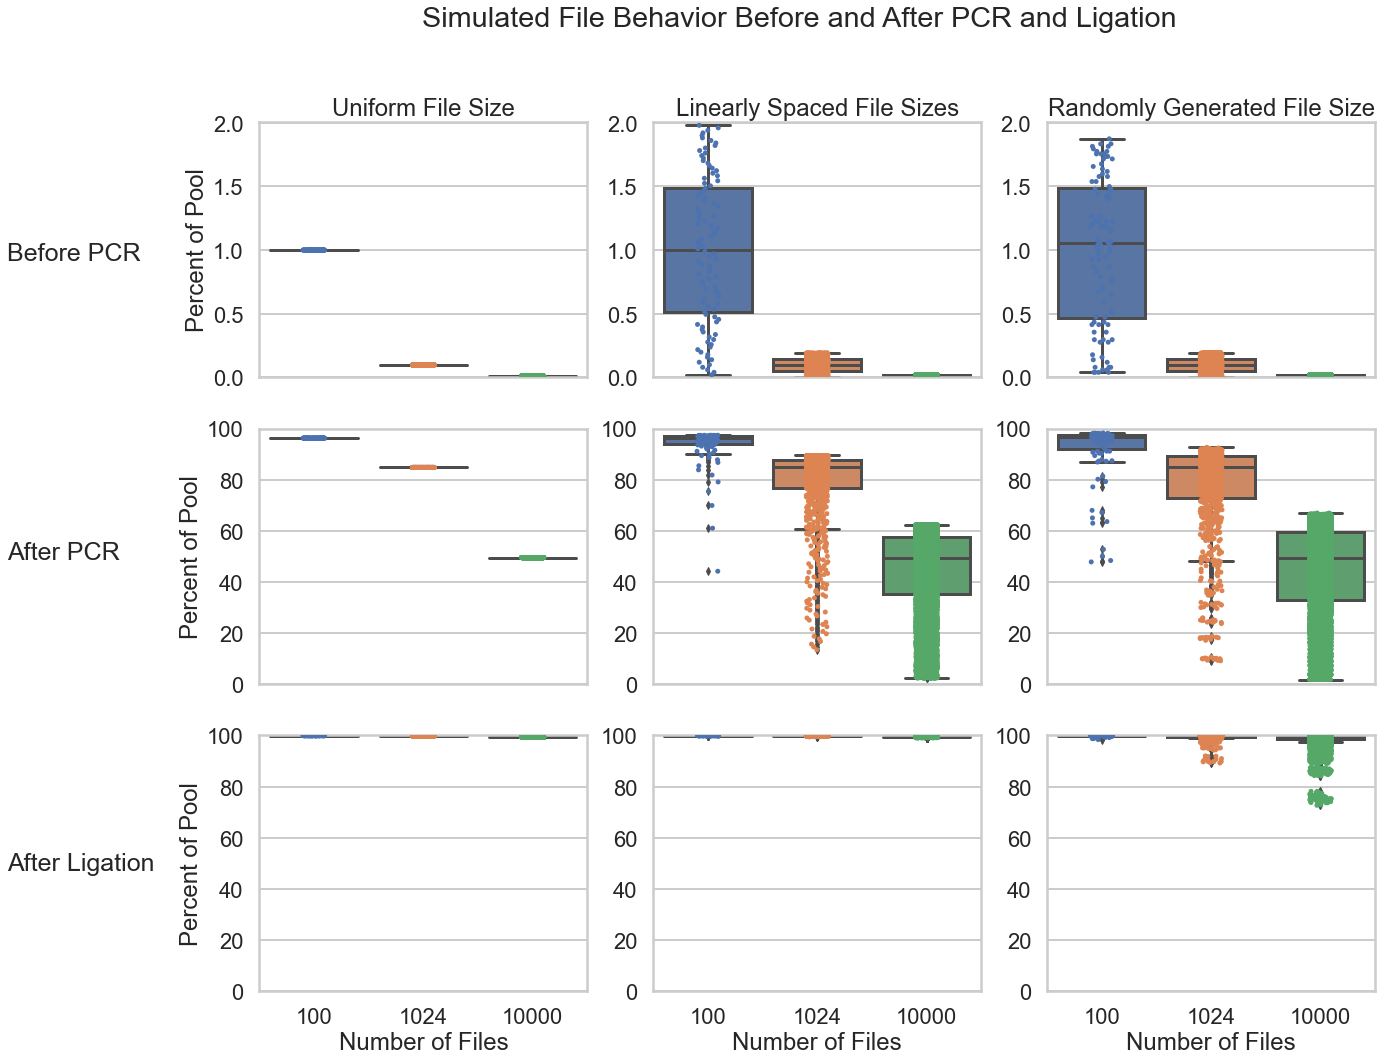

<Figure size 432x288 with 0 Axes>

In [24]:
primer_specs_to_analyze = [[100,10,10], [1024, 32, 32], [10000, 100,100]]
sim_pcr = {"Number of Files": []}
methods = ["Uniform File Size", "Randomly Generated File Size", "Linearly Spaced File Sizes"]

for method in methods:
    for pspec in primer_specs_to_analyze:
        if method == "Uniform File Size":
            ra_eff_bfPCR, ra_eff_afPCR, ra_eff_afLig = sim_random_access_eff_uniFileSize(pspec)
        elif method == "Linearly Spaced File Sizes":
            ra_eff_bfPCR, ra_eff_afPCR, ra_eff_afLig = sim_random_access_eff_linspaceFileSize(pspec)
        elif method == "Randomly Generated File Size":
            ra_eff_bfPCR, ra_eff_afPCR, ra_eff_afLig = sim_random_access_eff_ranFileSize(pspec)
        else:
            print ("error")
        sim_pcr = make_pcr_sim_dict_subfigs(ra_eff_bfPCR, ra_eff_afPCR, ra_eff_afLig, pspec, sim_pcr, method)
        
sim_pcr = pd.DataFrame(sim_pcr)

boxplots_sim_pcr_data_subfigs(sim_pcr, save_path, 'box_pcr_sim_fig_1xto100X.png')

In [6]:
sim_pcr

,Number of Files,Uniform File Size-Before PCR,Uniform File Size-After PCR,Uniform File Size-After Lig,Randomly Generated File Size-Before PCR,Randomly Generated File Size-After PCR,Randomly Generated File Size-After Lig,Linearly Spaced File Sizes-Before PCR,Linearly Spaced File Sizes-After PCR,Linearly Spaced File Sizes-After Lig
0,100,1.00,96.234579,99.940751,1.025843,95.906627,99.926329,0.019802,44.211346,99.645556
1,100,1.00,96.234579,99.940751,1.834681,97.789248,99.961696,0.039604,61.044683,99.825745
2,100,1.00,96.234579,99.940751,0.295916,87.282623,99.728907,0.059406,69.918426,99.885953
3,100,1.00,96.234579,99.940751,1.420399,97.344024,99.948610,0.079208,75.398572,99.916085
4,100,1.00,96.234579,99.940751,1.203393,96.645450,99.938162,0.099010,79.119356,99.934172
...,...,...,...,...,...,...,...,...,...,...
11119,10000,0.01,49.570821,99.352100,0.003408,24.958657,98.108753,0.019794,62.431567,99.355030
11120,10000,0.01,49.570821,99.352100,0.011829,53.366803,99.452266,0.019796,62.433205,99.355094
11121,10000,0.01,49.570821,99.352100,0.002005,16.613317,96.822562,0.019798,62.434842,99.355158
11122,10000,0.01,49.570821,99.352100,0.019849,66.591653,99.675493,0.019800,62.436480,99.355222
